# How to identify the label based of the distribution of the data.

Imagine we have two distribution and we know the lable for each one and the we have a new un-labled distribution and we want to find its label based on the previous distribution we observed.

Easiest method is to check with the proper test for the null hypothesis that the samples come from the same continuous distribution.



Source codes available:
    [https://github.com/FarhadManiCodes/statistical-tests-two_distribution](https://github.com/FarhadManiCodes/statistical-tests-two_distribution)

In [1]:
#import utilities and modules 
%matplotlib inline  
from IPython.display import display as disp
import examples as ex
from random import randrange
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from scipy.stats import wasserstein_distance,energy_distance


## check different criteria for our specific example
in the following I created a distribution producer based on the data available at [WHO Height-for-age (5-19 years)](https://www.who.int/tools/growth-reference-data-for-5to19-years/indicators/height-for-age). lets say our targeted age is second grade student aged 6.5-7.5 so each boys and girls distribution is combined of 12 different distribution (data provided at WHO is divided by months)

### creat the distribution for training set

In [2]:
# creat the distribution for training set
girls_train = ex.girls_height_distribution(50,100)
boys_train = ex.boys_height_distribution(50,100)

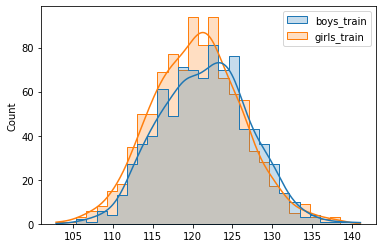

In [3]:
ax1 =sns.histplot([boys_train,girls_train],kde=True,element="step")
legend = ax1.get_legend()
handles = legend.legendHandles
legend.remove()
ax1.legend(handles, ['boys_train', 'girls_train']);

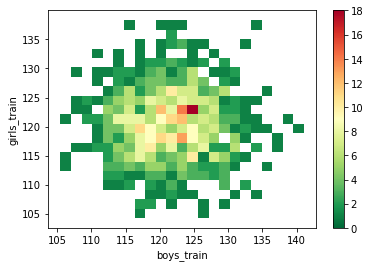

In [4]:
s_b , s_g = make_same_size(boys_train,girls_train)
ax2 =sns.histplot(x= s_b,y=s_g,cmap="RdYlGn_r",cbar=True)
ax2.set(xlabel='boys_train', ylabel='girls_train')
plt.show()

### creat the validation set

In [5]:
# creat the validation set
boys_val = ex.boys_height_distribution(10,50)
girls_val = ex.girls_height_distribution(10,50)

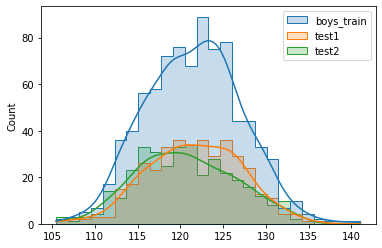

In [6]:
# compare girl train to each of the test set by eye
ax1 =sns.histplot([boys_train,boys_val,girls_val],kde=True,element="step")
legend = ax1.get_legend()
handles = legend.legendHandles
legend.remove()
ax1.legend(handles, ['boys_train', 'test1','test2']);

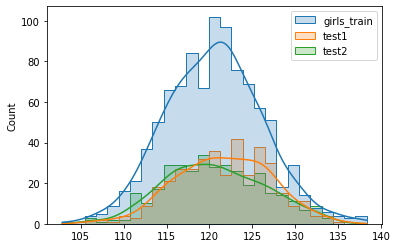

In [7]:
# compare boy train to each of the test set by eye
ax1 =sns.histplot([girls_train,boys_val,girls_val],kde=True,element="step")
legend = ax1.get_legend()
handles = legend.legendHandles
legend.remove()
ax1.legend(handles, ['girls_train', 'test1','test2']);

it is clear that just by investigating by eye it would not be possible to solve this classification we need a better metric

## lets try comparing the mean

In [8]:
calculate_stats_distances(boys_train,girls_train,boys_val,girls_val,method=mean_distance) # first output is number of error from 0-2 in the categorizing the method

(0,
 {'a_train_test': 0.11240092424303327,
  'b_train_test': 0.09818516654604537,
  'a_train_b_test': 0.9012636522873407,
  'b_train_a_test': 1.1118497430764194})

not bad but if repeat we might get some error

## lets try comparing the using wasserstein_distance 
[scipy.stats.wasserstein_distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html#scipy.stats.wasserstein_distance). 

In [9]:
calculate_stats_distances(boys_train,girls_train,boys_val,girls_val,method=wasserstein_distance)

(0,
 {'a_train_test': 0.30477594961684495,
  'b_train_test': 0.4117670785704225,
  'a_train_b_test': 0.9193515786239463,
  'b_train_a_test': 1.1757830470569601})

## or energy_distance
[scipy.stats.energy_distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.energy_distance.html#scipy.stats.energy_distance). 

In [10]:
calculate_stats_distances(boys_train,girls_train,boys_val,girls_val,method=energy_distance)

(0,
 {'a_train_test': 0.09579030383344098,
  'b_train_test': 0.13221121663295576,
  'a_train_b_test': 0.3275546761511631,
  'b_train_a_test': 0.3923118756131048})

## checking for  Alexander Govern testa
[scipy.stats.alexandergovern](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.alexandergovern.html). 

In [11]:
calculate_stats_distances(boys_train,girls_train,boys_val,girls_val,method=ttest_dist)

(0,
 {'a_train_test': 0.1323043603078875,
  'b_train_test': 0.8215311933909095,
  'a_train_b_test': 0.9966430547522643,
  'b_train_a_test': 0.996077968661258})

## checking for ttest
[scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel). 

In [12]:
calculate_stats_distances(boys_train,girls_train,boys_val,girls_val,method=alexander_distance)

(0,
 {'a_train_test': 0.26337600950124285,
  'b_train_test': 0.21804682502830608,
  'a_train_b_test': 0.9877402537735457,
  'b_train_a_test': 0.9992203511039703})

# each of these methods seems to give us good estimation but what is their succuss rate for normal distribution and in comparioson to other methods

to address that I wrote a subroutin that check each method of calculating distance between two distributin for a number of  ittereation  e.g. 10000
it compare following methods:
- wasserstein_distance, 
- energy_distance,
- mean_distance, 
- (ks) Kolmogorov–Smirnov test,
- epps_singleton test,
- Cramér-von Mises test,
- Alexander Govern test
- ttestrel

In [13]:
%run -i 'test.py'

/home/farhad/Projects/interviews/opplane/statistical-tests-two_distribution/utils.py:57: UserWarning: could not specify correct class for
                            the second distribution
  warnings.warn("""could not specify correct class for
/home/farhad/Projects/interviews/opplane/statistical-tests-two_distribution/utils.py:53: UserWarning: could not specify correct class for
                            the fist distribution
  warnings.warn("""could not specify correct class for


num_warnings for wasserstein_distance:  428
total_error_percentage:     4.28%
num_warnings for energy_distance:  464
total_error_percentage:     4.64%
num_warnings for mean_distance:  437
total_error_percentage:     4.37%
num_warnings for kolmogorov_smirnov:  560
total_error_percentage:     5.60%
num_warnings for epps_singleton:  549
total_error_percentage:     5.49%
num_warnings for cramer_distance:  486
total_error_percentage:     4.86%
num_warnings for alexander_distance:  454
total_error_percentage:     4.54%
num_warnings for ttest_dist:  606
total_error_percentage:     6.06%


<Figure size 432x288 with 0 Axes>

It seems most of the methods have good performance  between 4-6%

### How to make this work more general
this test was done for data driven from accumulation of normal distribution each of the test perform better or worse based on what is the assumed distributiuon to have 
a more clear Idea we can test these methods on other distributions